Преобразуем датафрейм в gif-анимацию. Краткий туториал по анимированной визуализации данных с помощью Python и библиотеки moviepy на примере распространения COVID-19.



Создание динамики в визуализации данных позволяет рассказать историю более выигрышно. Это несложно, если вы используете Python. Для построения в этой статье мы воспользуемся данными по распространению COVID-19 в США – в настоящий момент именно в США наибольшее количество заболевших (сейчас уже почти 1 млн человек). Отфильтруем топ-5 пострадавших штатов по состоянию на 16 апреля 2020 года, добавим Вашингтон и Калифорнию и построим график числа заболевших в пересчёте на 100 тысяч человек. Итоговый результат, к которому мы стремимся, выглядит так:

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import glob
import moviepy.editor as mpy

#  Преобразование данных в датафреймы
df = pd.read_csv('us-states.csv', parse_dates=['date'])
populations = pd.read_csv('nst-est2019-alldata.csv', usecols=['NAME', 'POPESTIMATE2019'])

# Объединение данных по населению; пересчет на 100 тыс.
df = pd.merge(df, populations, how = 'left', left_on = 'state', right_on = 'NAME')
df['rate'] = df['cases'] / df['POPESTIMATE2019'] * 100000

Теперь у нас есть данные по всем штатам – но этого слишком много. Визуализация данных получилась бы беспорядочной и непонятной. Поэтому ограничим наш анализ и отберем штаты с самым высоким коэффициентом заболевших по состоянию на 16 апреля 2020 года. Добавим к ним также Вашингтон и Калифорнию, поскольку у них рано было зарегистрировано большое число случаев заболевания.

In [2]:
#  Выборка штатов
df_1604 = df[df['date'] == '2020-04-16']
topfivestates_rate = list(df_1604.sort_values(by='rate', ascending=False).head()['state'])
topfivestates_rate.append('California')
topfivestates_rate.append('Washington')

# Фильтрация датасета
df = df[df['state'].isin(topfivestates_rate)]
df = df[df['date'] >= '2020-03-01']
df = df.pivot(index = 'date', columns = 'state', values = 'rate')

# Подготовка данных к отображению
df = df.reset_index()
df = df.reset_index(drop=True)
df = df.drop(columns = 'date')

В четвертой секции мы отбираем штаты, которые войдут в конечную визуализацию. Для этого создаем новый фрейм df_1604, в который входят только данные за 16 апреля. Сортируем его по убыванию, отбираем первые пять позиций и формируем таким образом список штатов с самым высоким показателем rate. Добавляем дополнительно Вашингтон и Калифорнию.

В секции 5 фильтруем исходный датафрейм – оставляем только отобранные штаты. Ограничиваем начало диапазона 1 марта 2020, так как до этой даты случаев заболевания было мало или информация о них неполная. Наконец, создаем сводную таблицу, подготовленную к отображению.

В шестой секции сбрасываем индекс многоиндексного датафрейма, чтобы обеспечить возможность построения графиков. Удаляем столбец даты. Это довольно спорное решение, но учитывая то, что мы хотим анимировать график, будет проще отображать динамику относительно количества дней, прошедших с 1 марта 2020 года.

Приведенный ниже код повторяется несколько раз – он создает множество png-изображений для разных временных точек. Затем мы просто сошьем их вместе, чтобы получить gif-изображение.

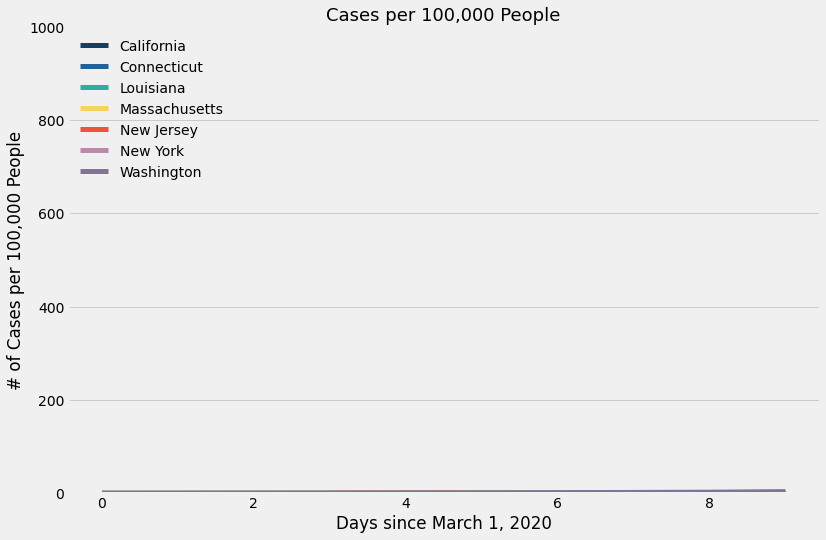

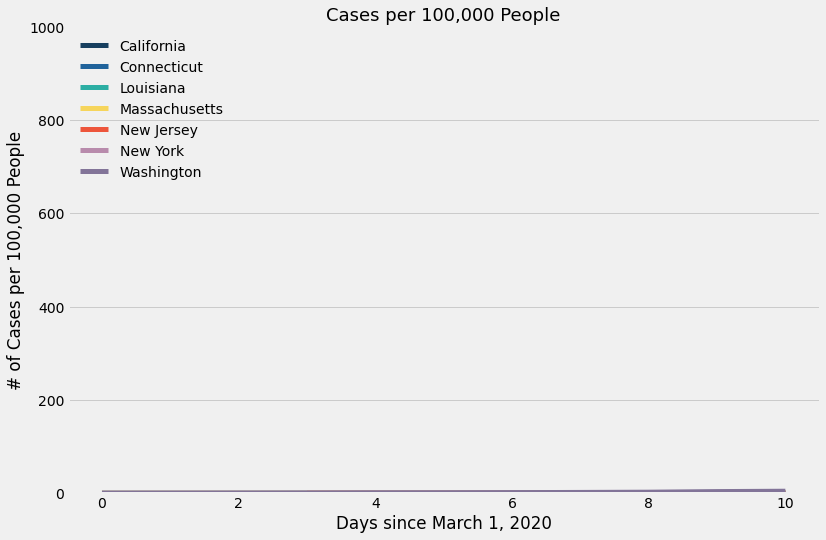

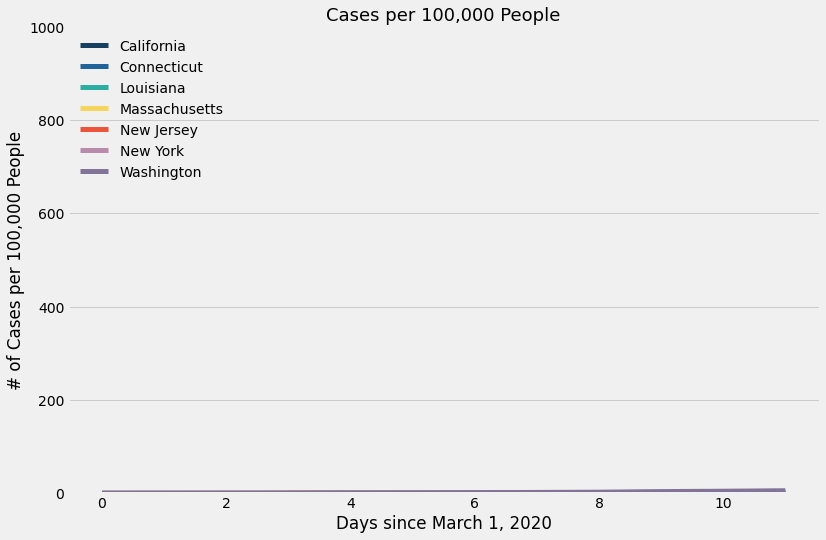

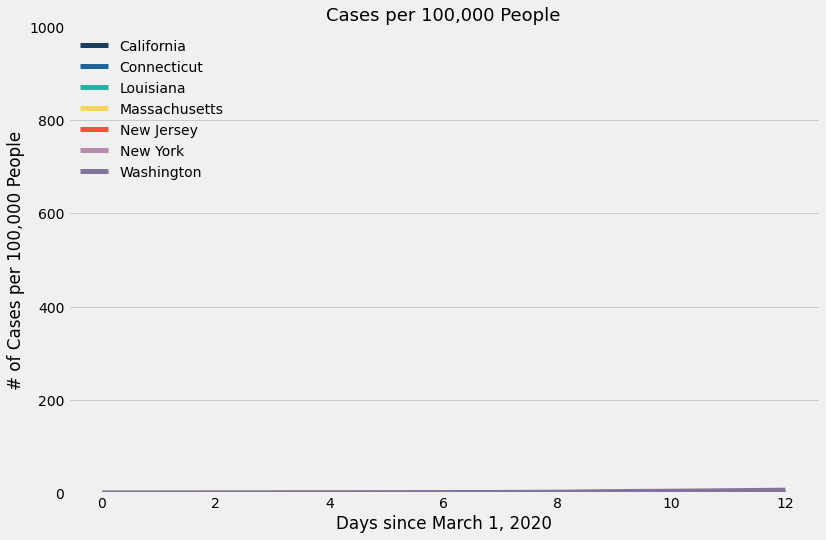

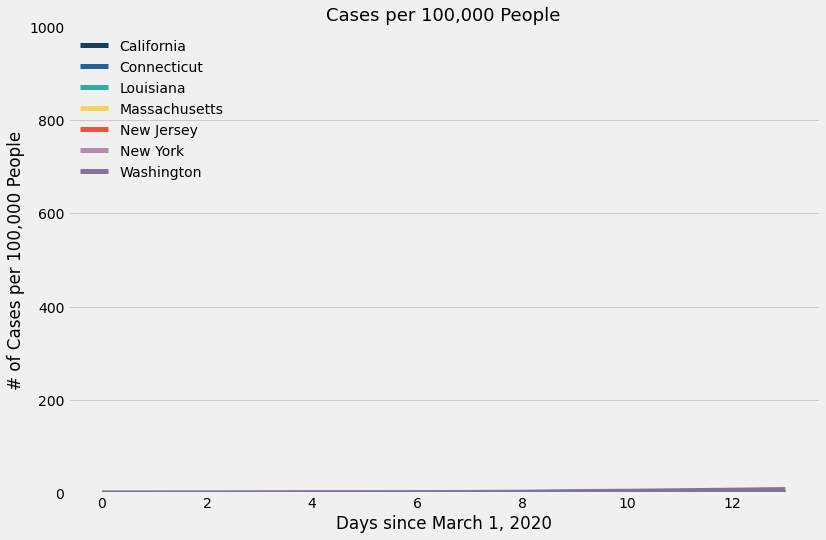

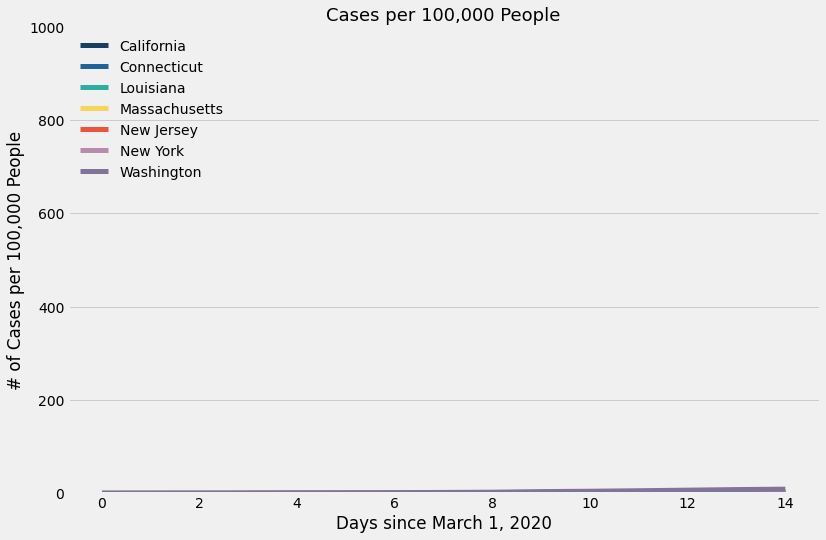

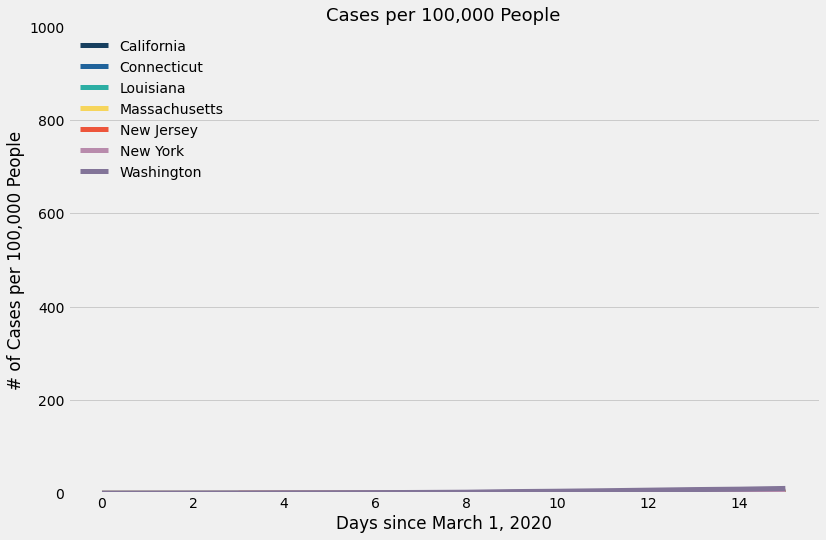

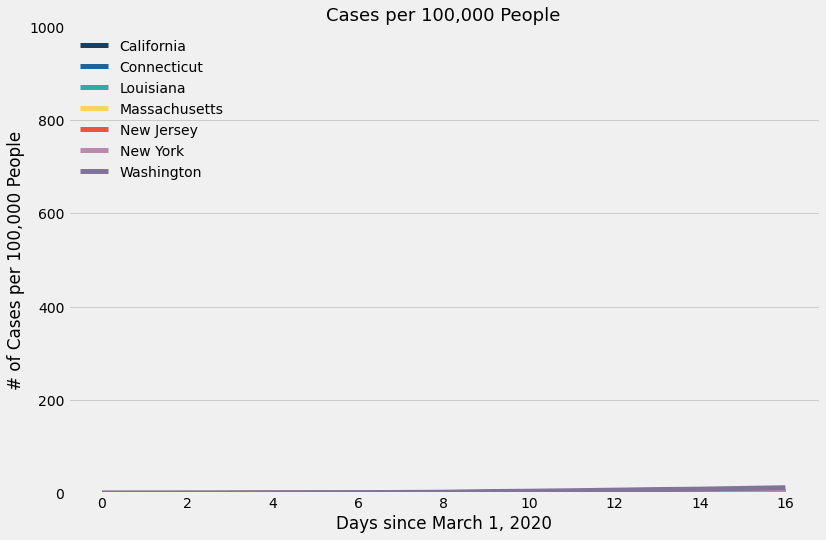

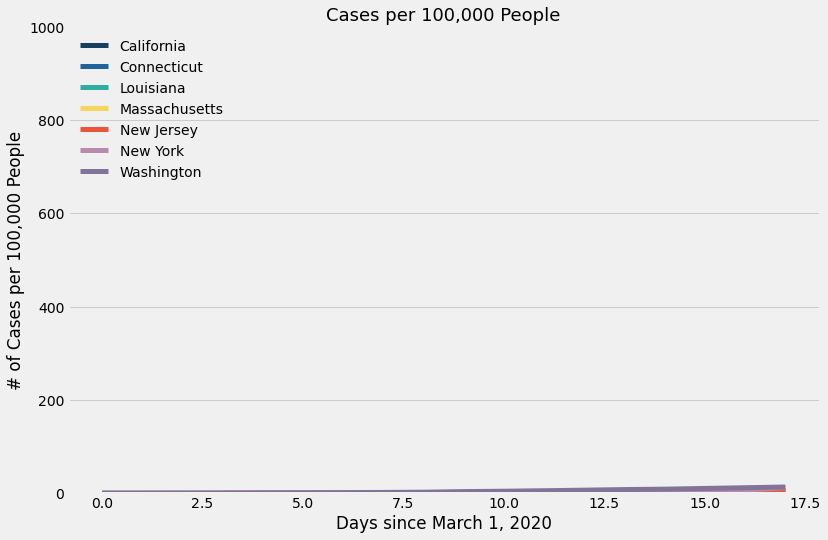

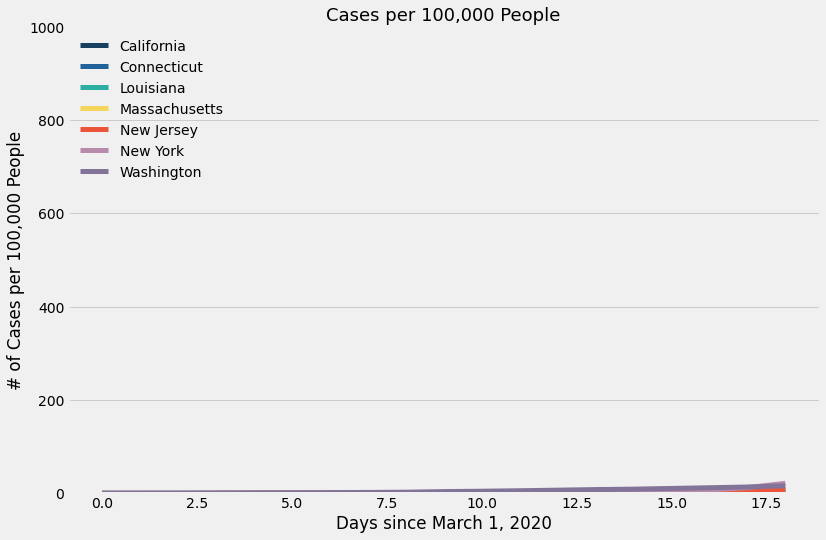

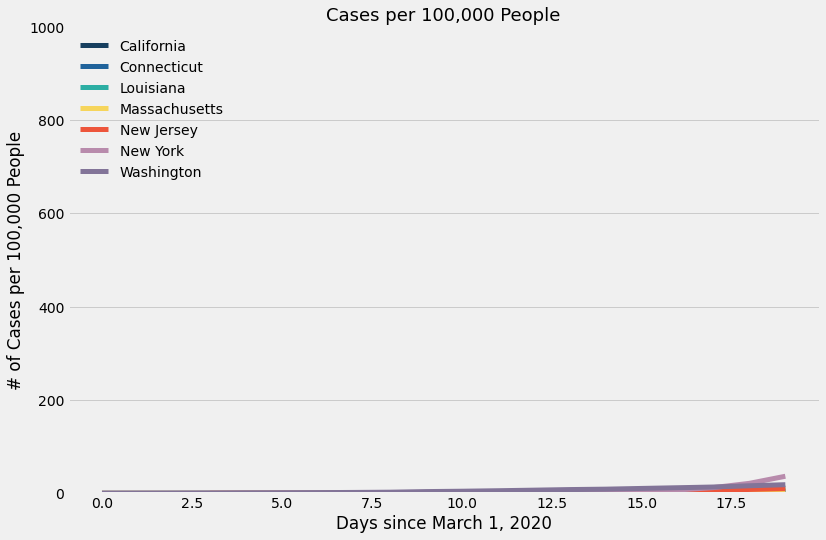

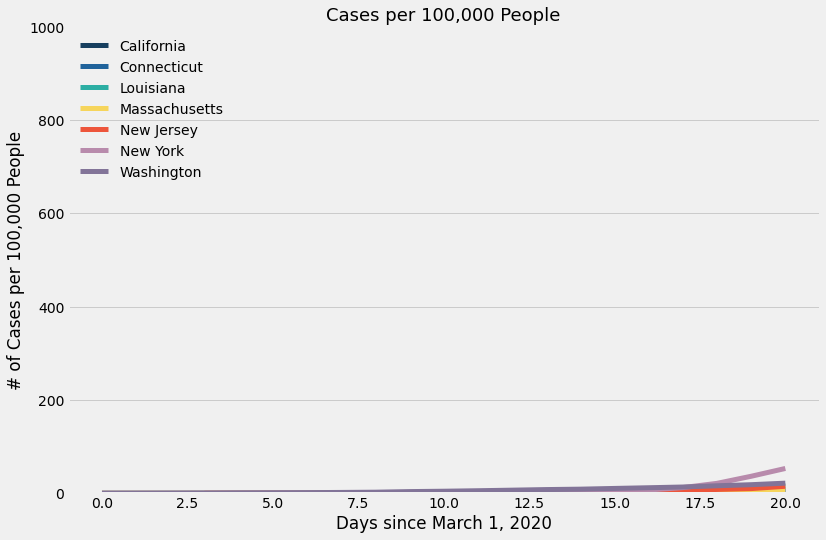

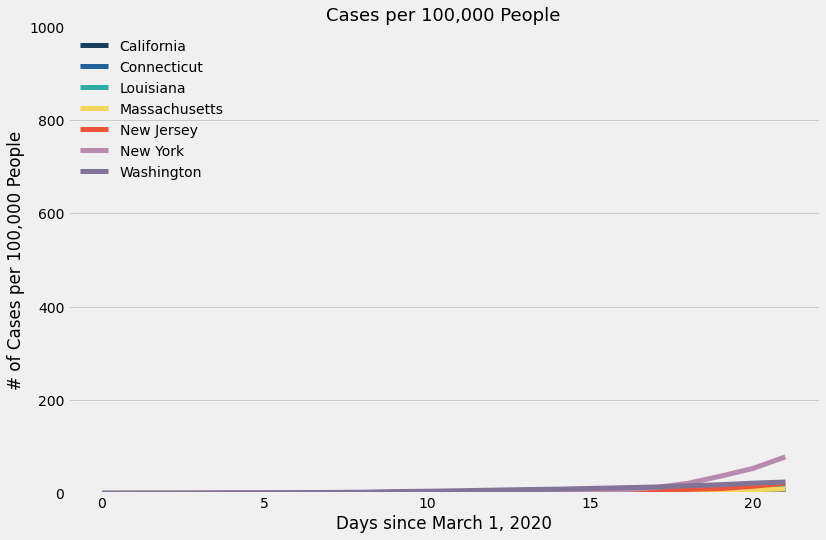

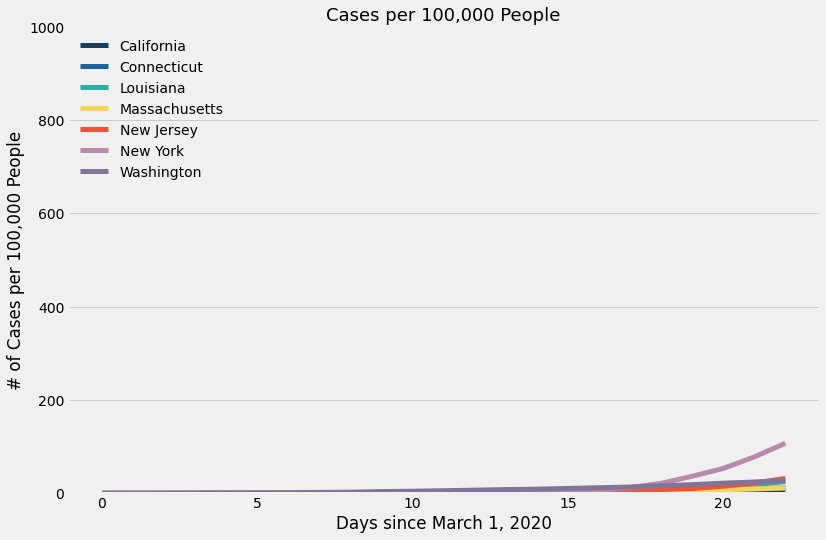

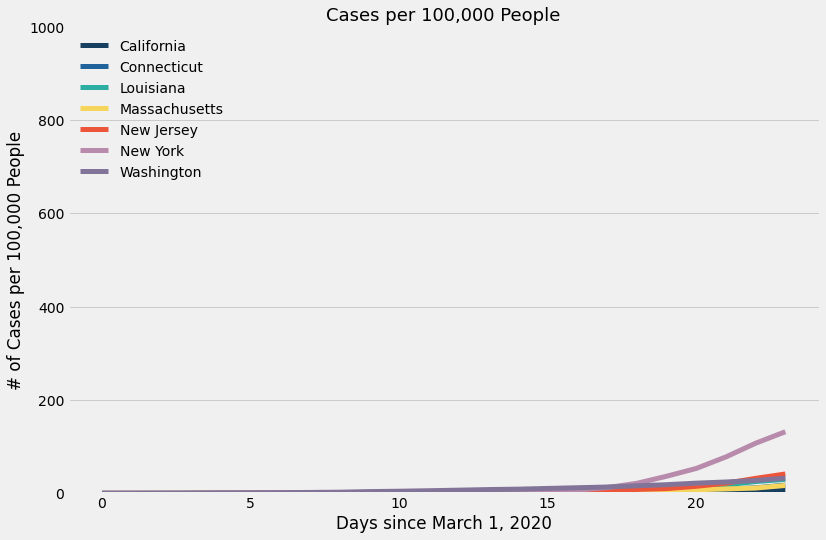

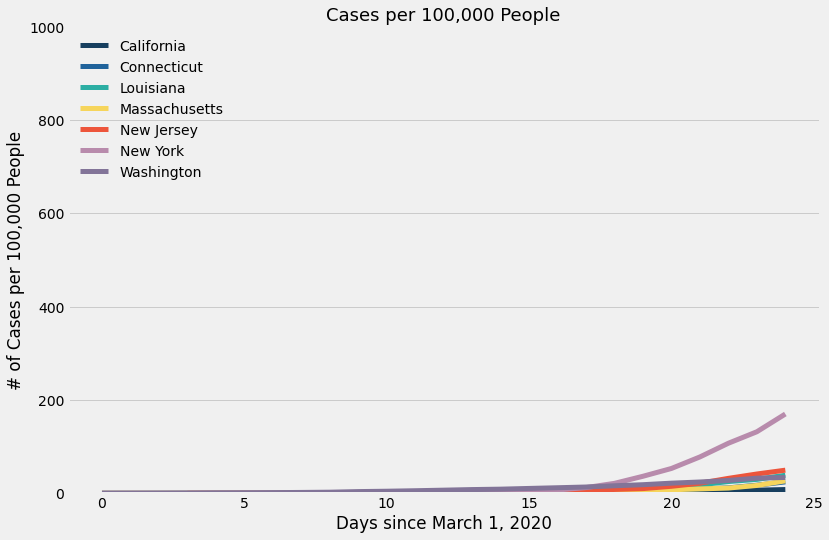

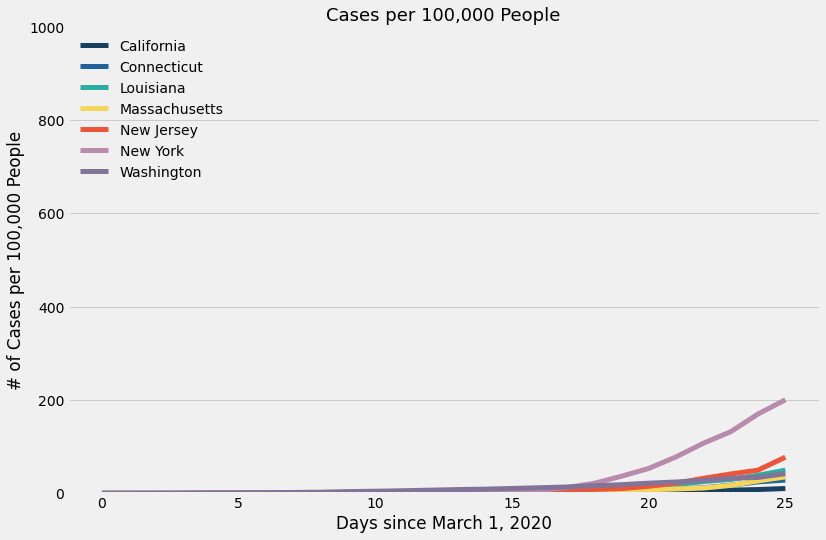

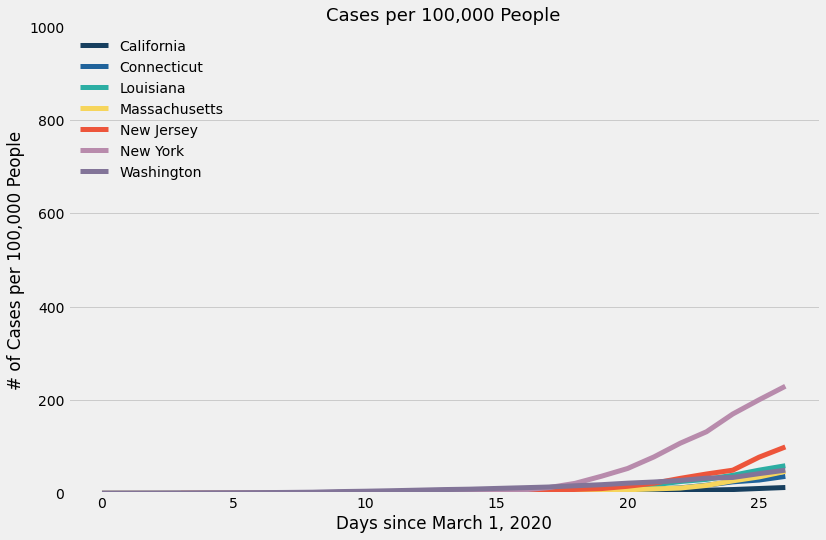

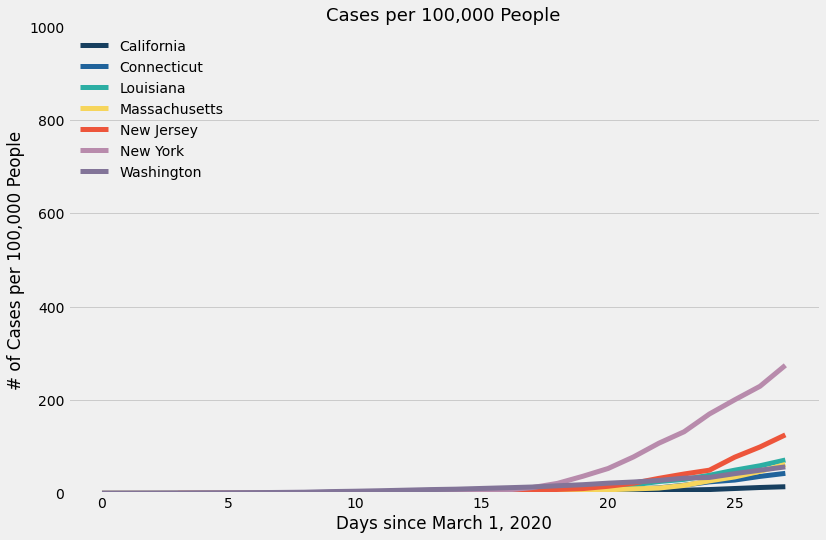

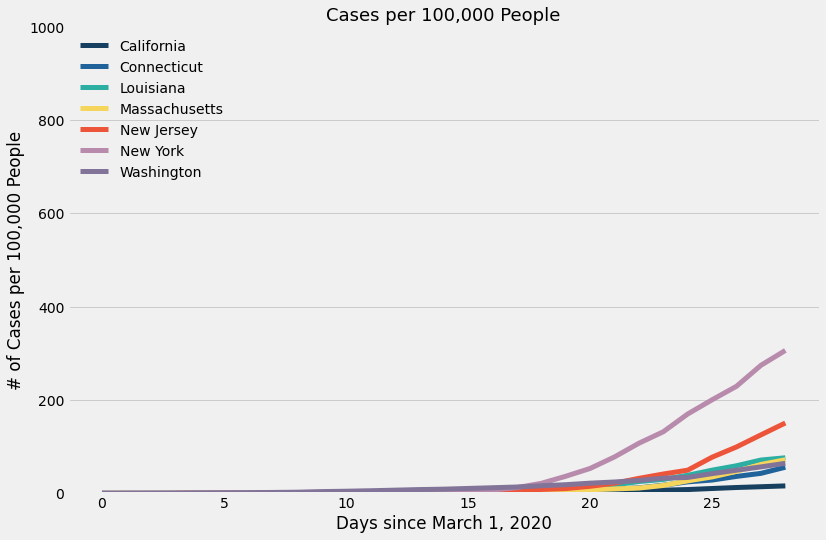

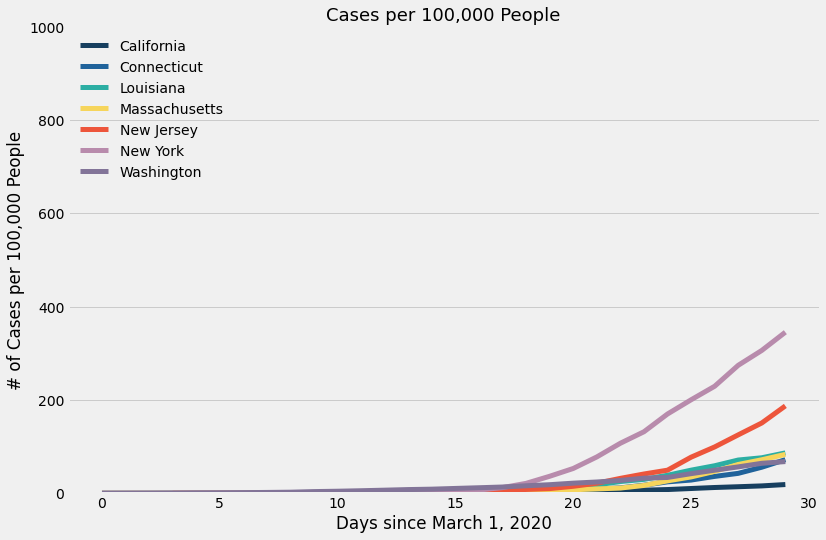

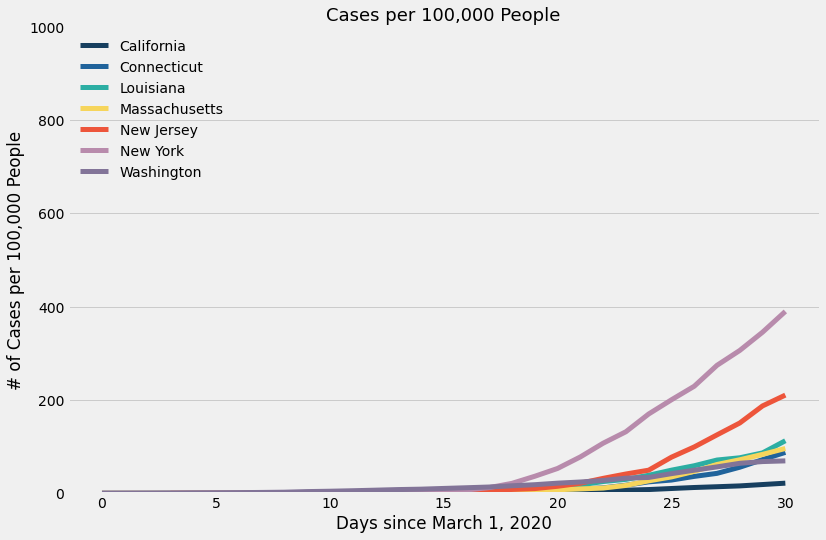

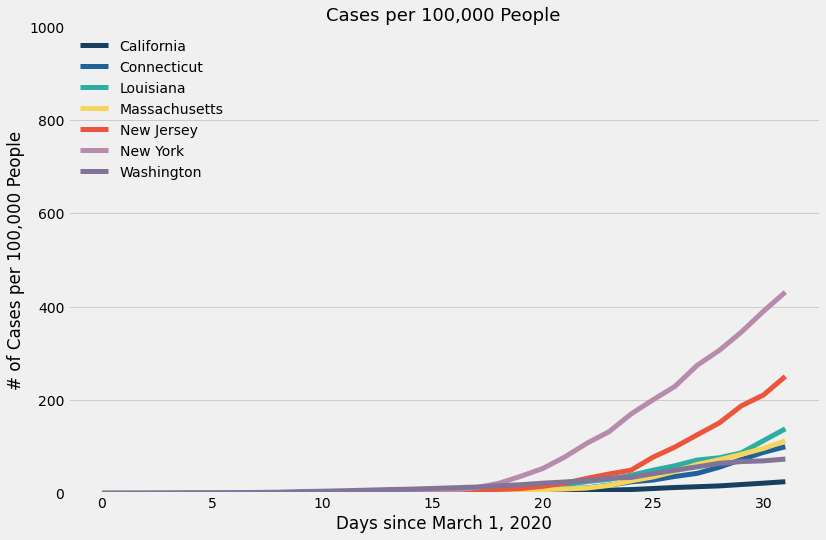

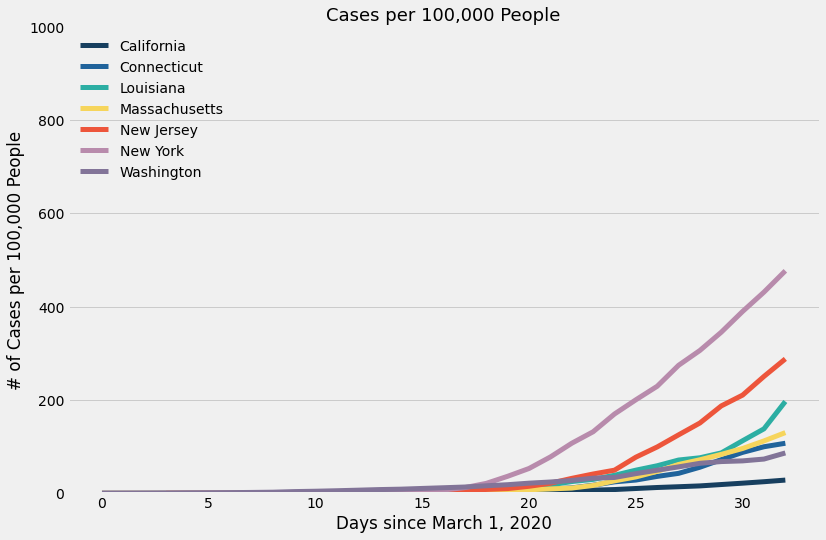

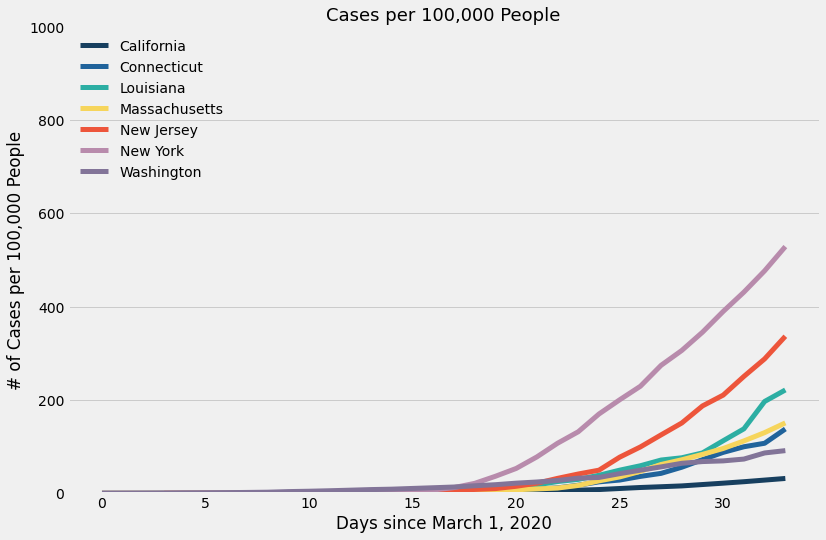

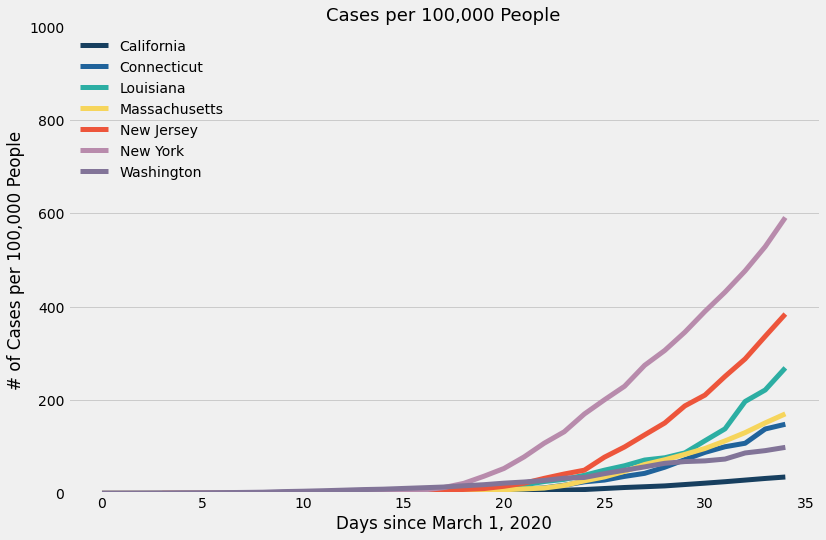

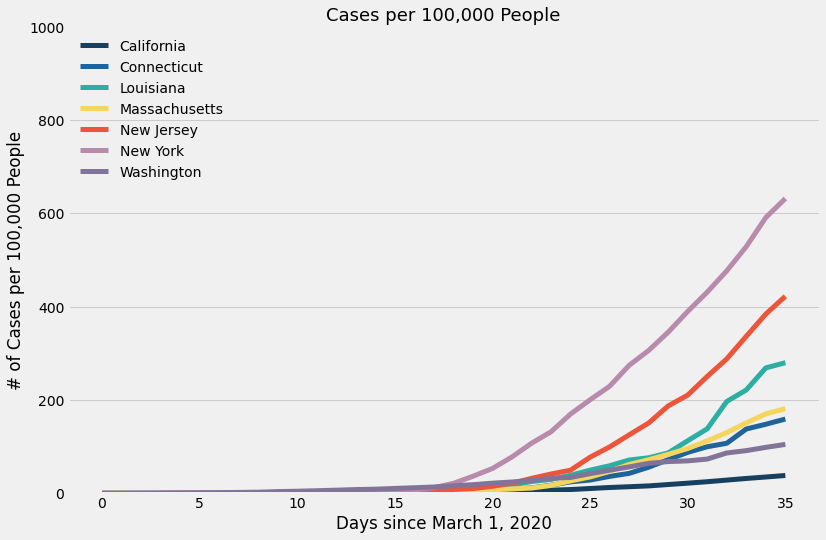

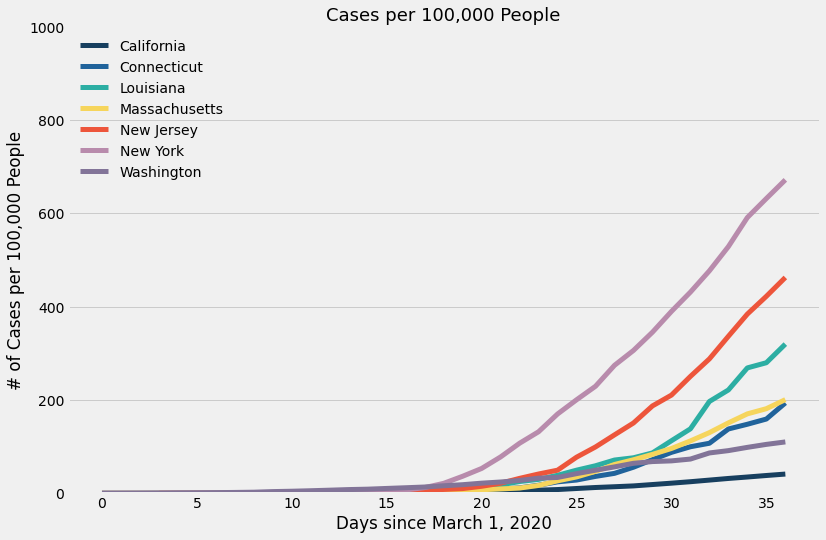

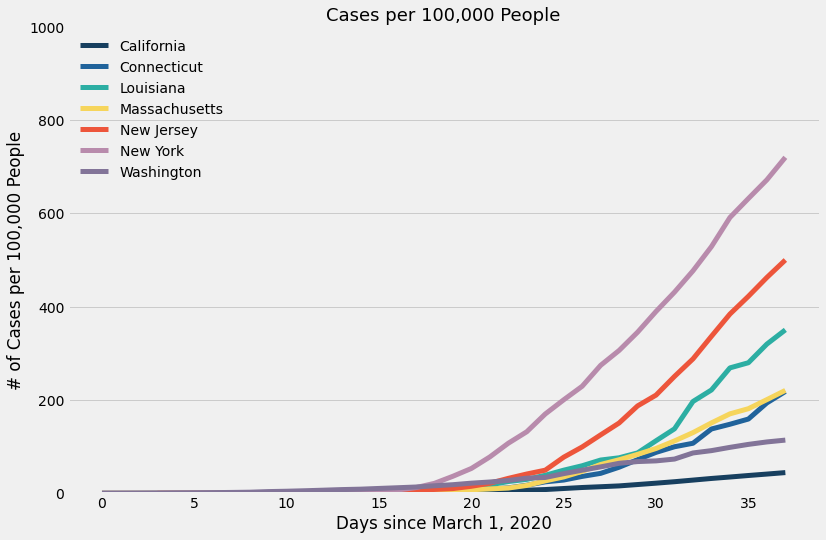

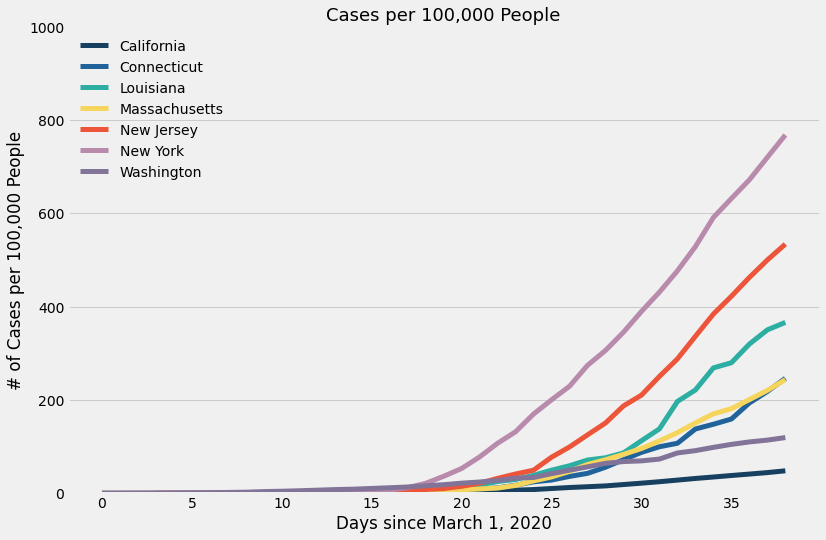

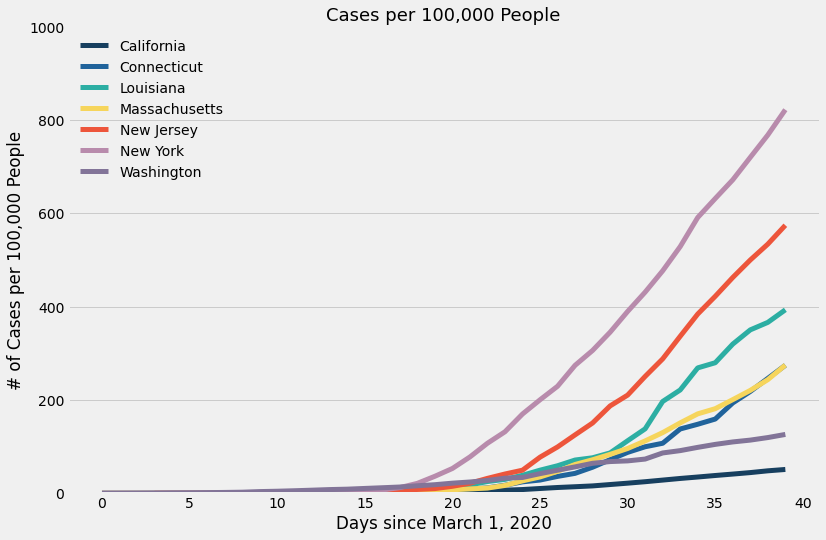

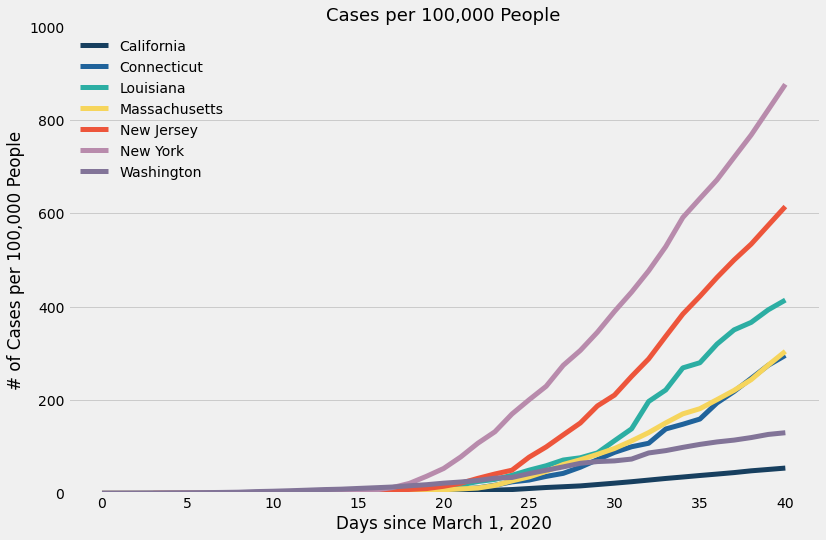

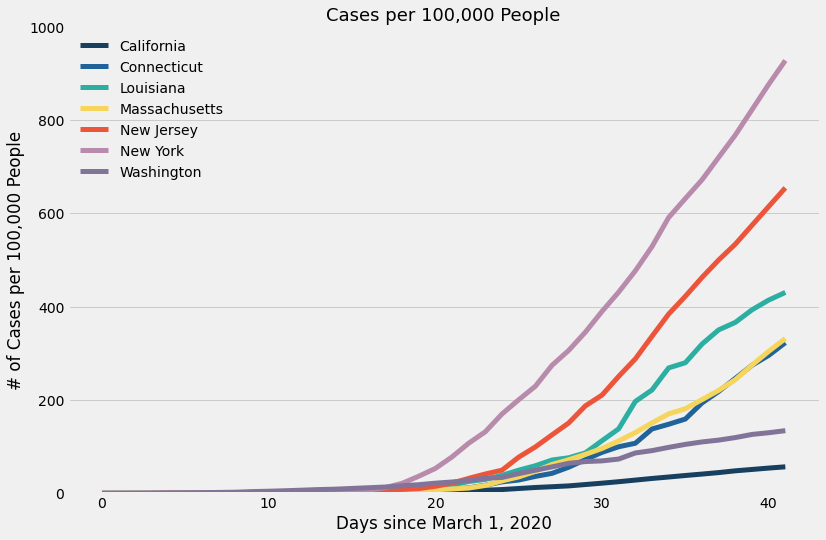

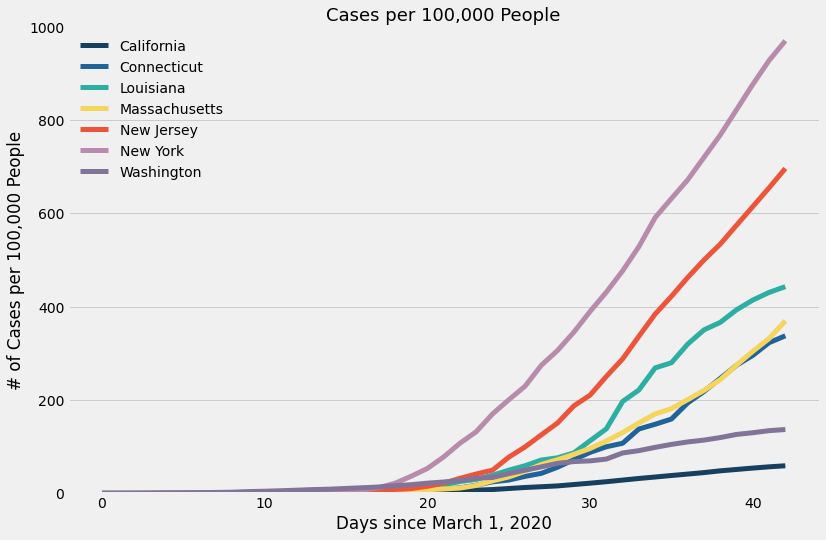

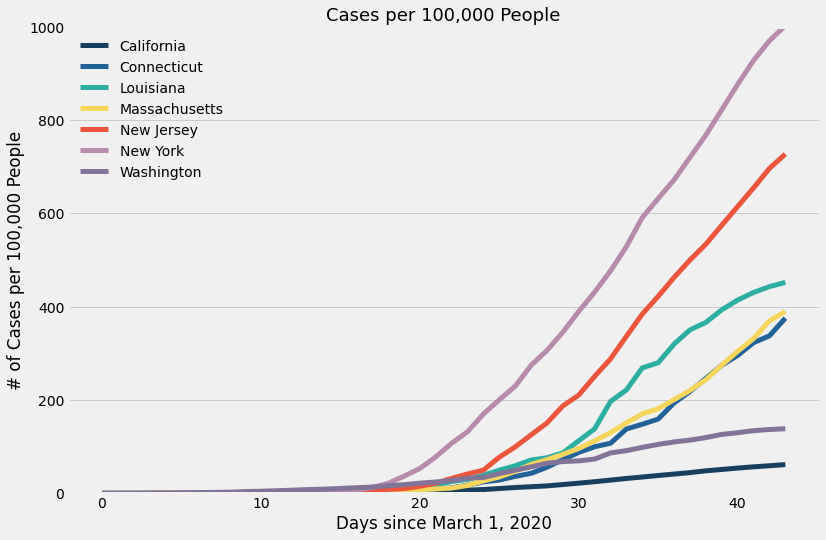

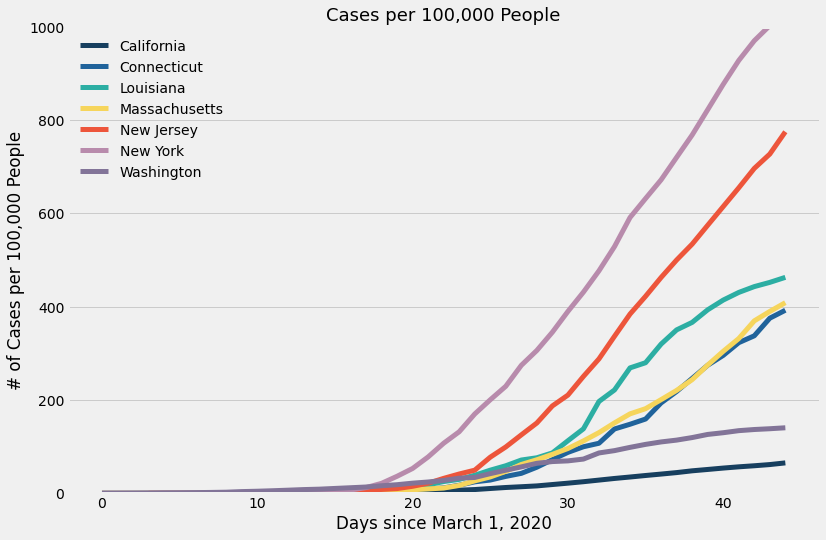

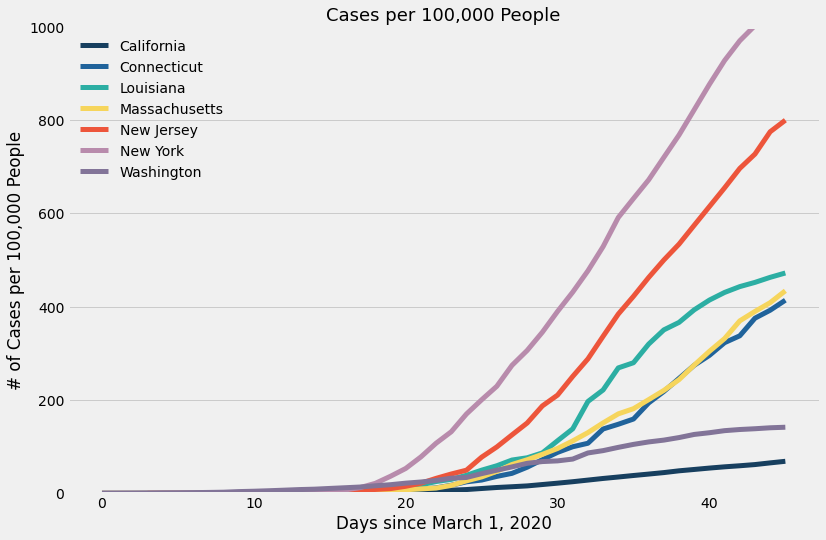

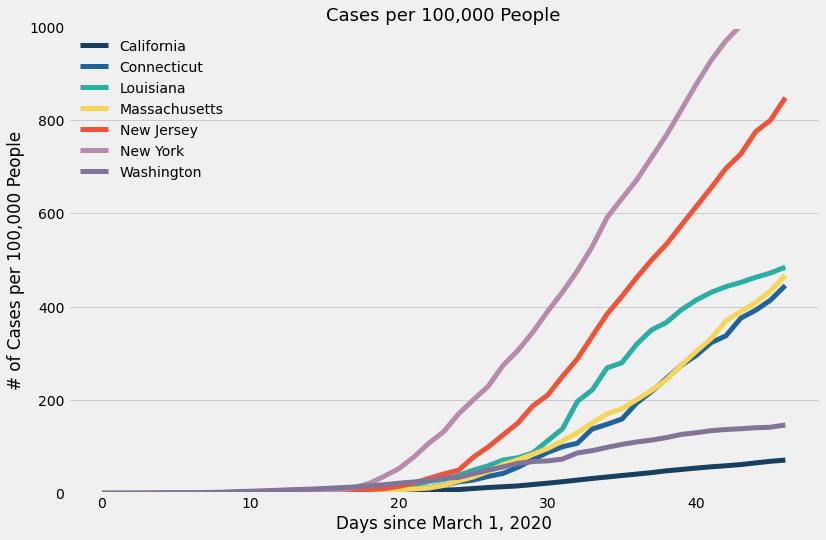

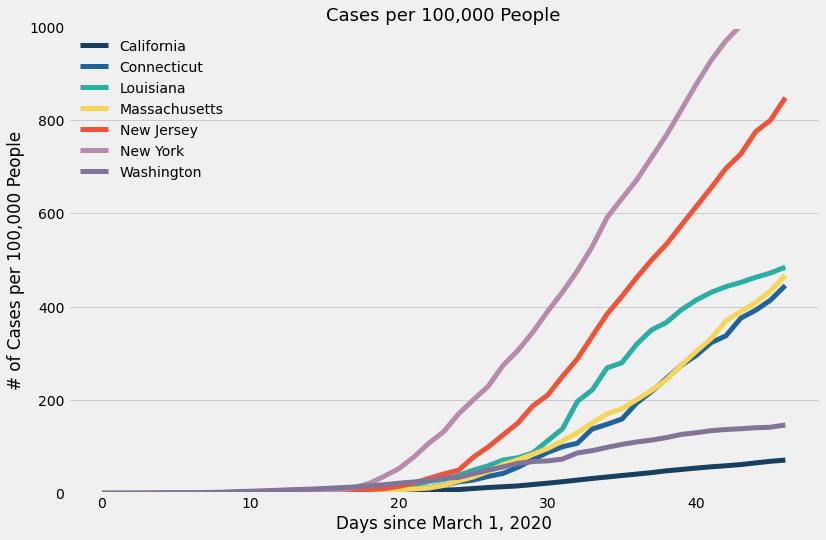

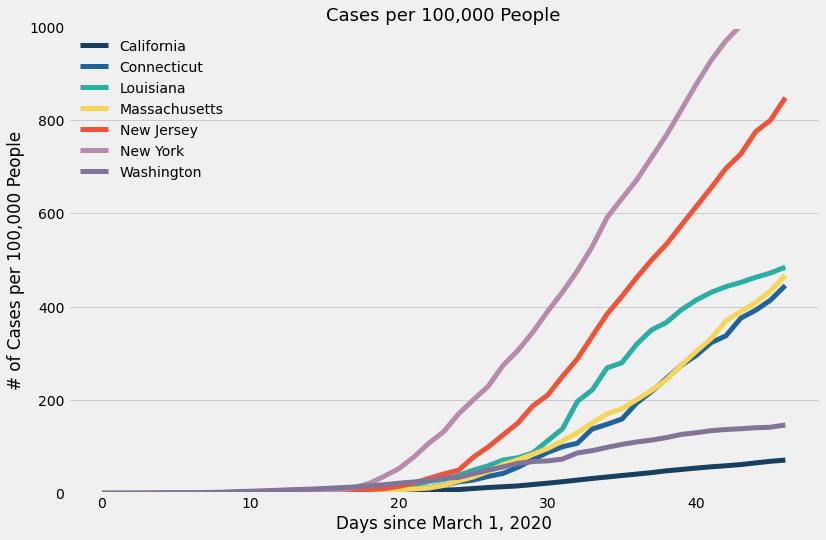

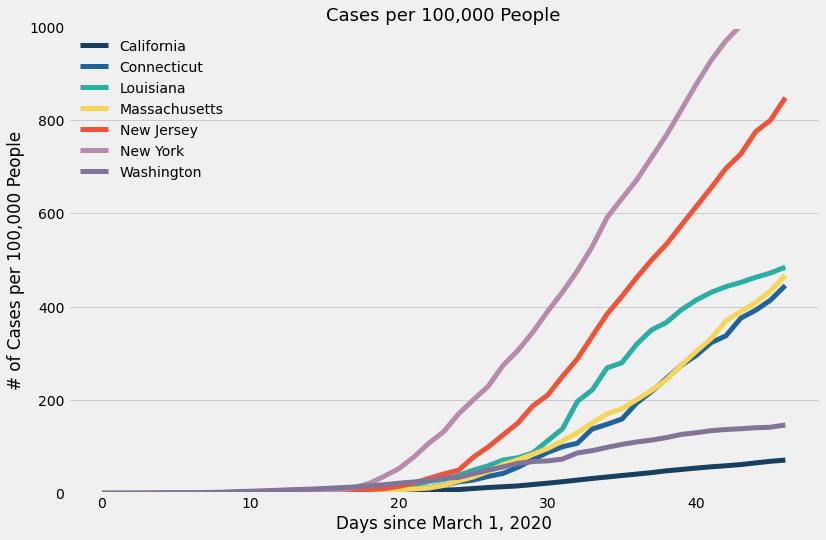

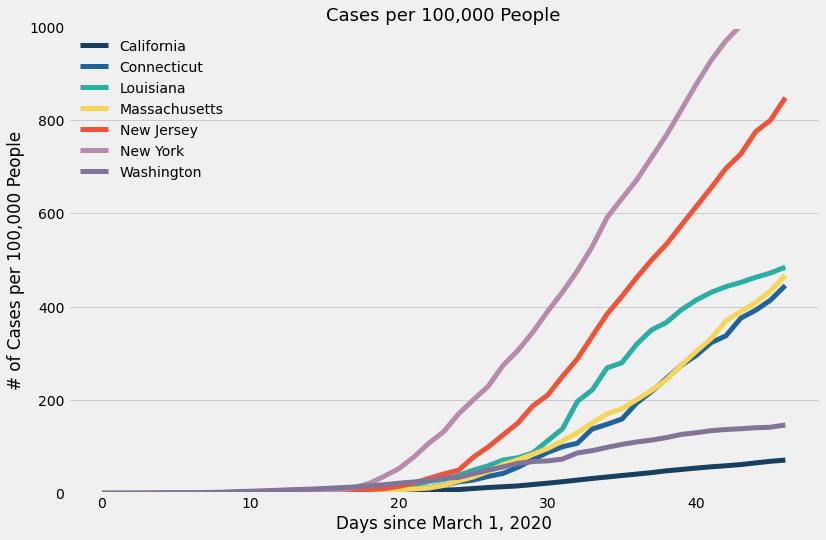

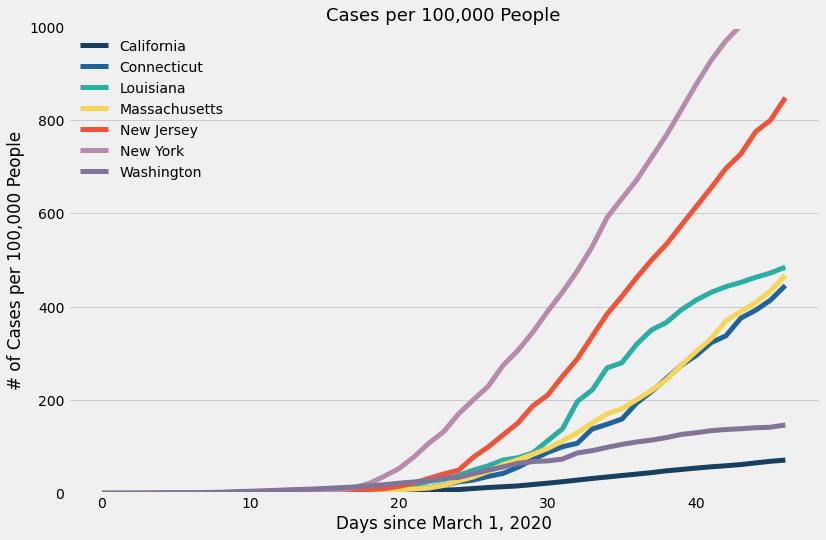

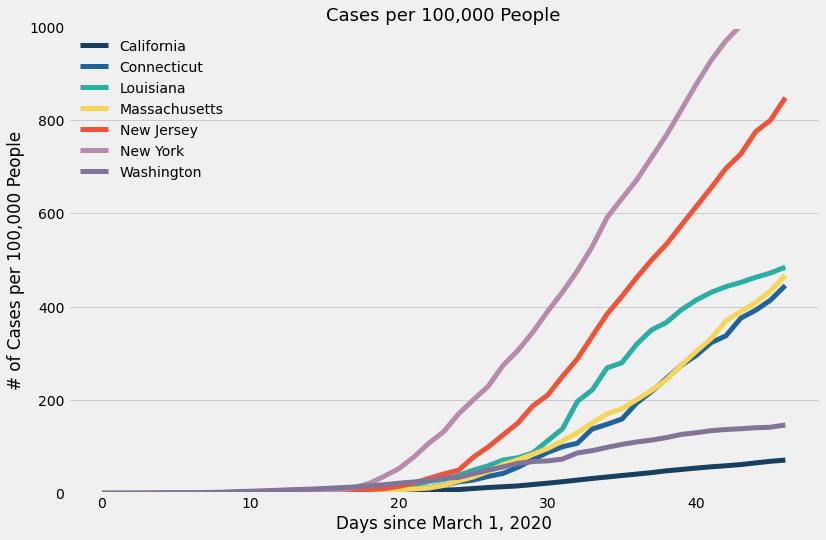

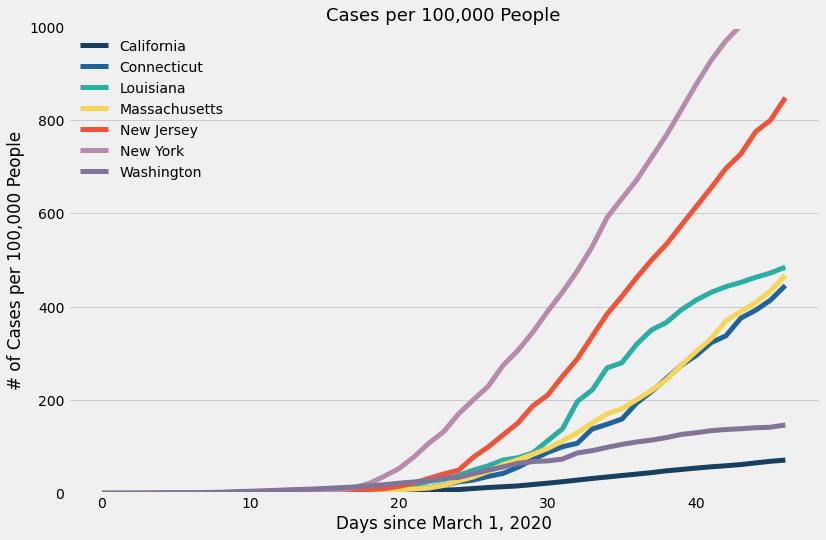

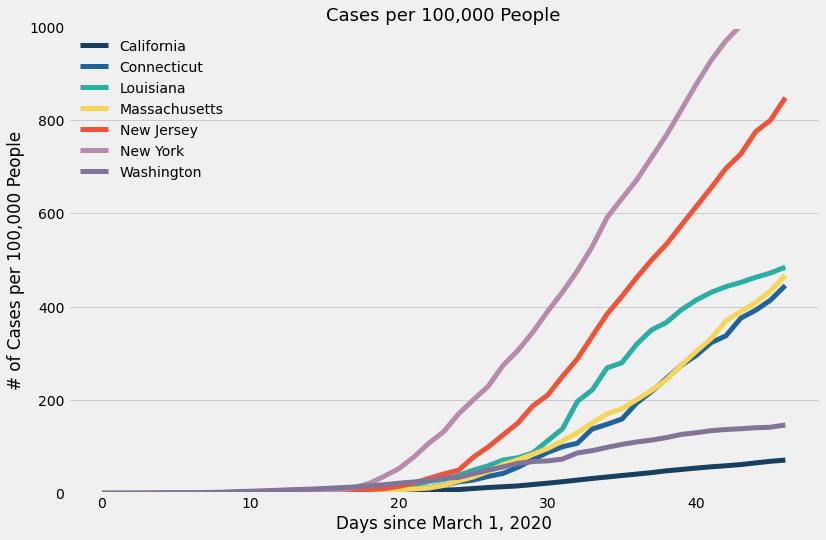

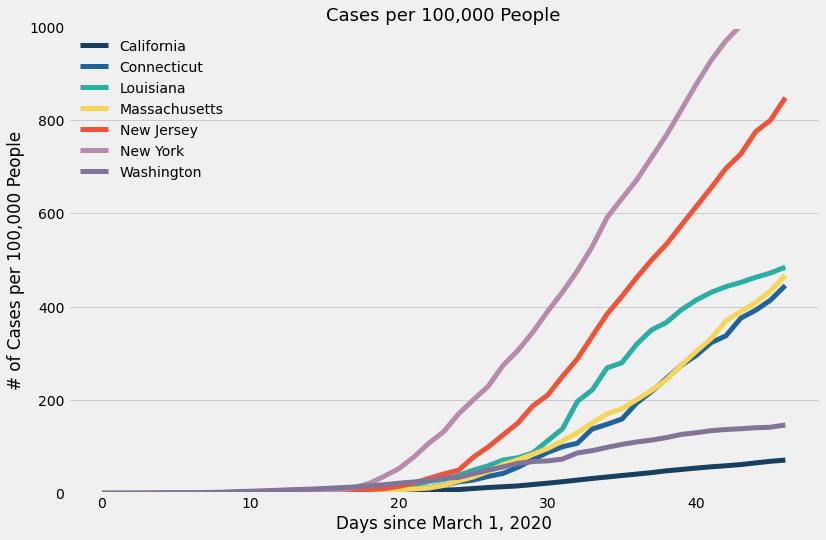

In [3]:
# Построение графиков
plt.style.use('fivethirtyeight')
length = len(df.index)
for i in range(10,length+10):
    ax = df.iloc[:i].plot(figsize=(12,8), linewidth=5, color = ['#173F5F', 
                                                                '#20639B', 
                                                                '#2CAEA3', 
                                                                '#F6D55C', 
                                                                '#ED553B', 
                                                                '#B88BAC', 
                                                                '#827498'])
    ax.set_ylim(0, 1000)
    ax.set_xlabel('Days since March 1, 2020')
    ax.set_ylabel('# of Cases per 100,000 People')
    ax.set_title("Cases per 100,000 People", fontsize = 18)
    ax.legend(loc='upper left', frameon=False)
    ax.grid(axis='x')
    fig = ax.get_figure()
    fig.savefig(f"C:/Users/Evgen/First_examples/Folder_For_Animation/{i}.png")

In [4]:
#  Генерация GIF
gif_name = 'COVID.gif'
fps = 6
file_list = glob.glob('C:/Users/Evgen/First_examples/Folder_For_Animation/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

t:   8%|██▌                           | 4/48 [00:00<00:01, 29.85it/s, now=None]

MoviePy - Building file COVID.gif.gif with imageio.


В этом фрагменте мы делаем две вещи:

Используем пакет glob для создания списка всех png-файлов (не забудьте указать правильный путь к папке). По сути мы просто берем все файлы из указанной директории, поэтому важно, чтобы кроме них там ничего не было.
Создаем gif-файл с помощью moviepy и сохраняем его в каталог текущего пользователя. Он будет отображаться со скоростью 6 кадров в секунду.

Так выглядит анимированный график, который мы создали за несколько простых шагов. Увы, он демонстрирует быстрое распространение COVID-19.